
# Лабораторная работа№4: Частотный анализ рекурсивных фильтров интегрирования

Выполнили: Борисов Иван Павлович, Иваницкий Илья Александрович



## Цель работы

Изучить частотные свойства рекурсивных фильтров, соответствующих квадратурным формулам численного интегрирования (прямоугольников, трапеций, Симпсона и «правила 3/8»).  
Построить их передаточные функции в аналитическом виде, провести численное моделирование и сравнительный анализ.



## Основные теоретические сведения

Для оценки интеграла на интервале дискретных отсчётов используются квадратурные формулы.  
Каждой формуле соответствует разностное уравнение, описывающее рекурсивный фильтр интегрирования.

- **Формула прямоугольников:**
  $$y_{n+1} = y_n + x_{n+1/2}$$

- **Формула трапеций:**
  $$y_{n+1} = y_n + \frac{1}{2}(x_n + x_{n+1})$$

- **Формула Симпсона:**
  $$y_{n+1} = y_{n-1} + \frac{1}{3}(x_{n-1} + 4x_n + x_{n+1})$$

- **Формула 3/8:**
  $$y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$$

Передаточная функция $$( H(\omega) )$$ определяется как отношение амплитуды отклика системы к амплитуде гармонического входного сигнала $$( x_n = e^{j\omega n} )$$.


## Формула прямоугольников

Исходное уравнение:
$$y_{n+1} = y_n + x_{n+1/2}, \quad y_0 = 0$$

Подставим гармонический сигнал:
$$y_n = H(\omega)e^{j\omega n}, \quad x_{n+1/2} = e^{j\omega (n+1/2)}$$

Подставляем в уравнение:
$$H(\omega)e^{j\omega (n+1)} = H(\omega)e^{j\omega n} + e^{j\omega (n+1/2)}$$

Вынесем общий множитель $e^{j\omega n}$ и выразим $H(\omega)$:

$$H(\omega)(e^{j\omega} - 1) = e^{j\omega/2}$$

$$H(\omega) = \frac{e^{j\omega/2}}{e^{j\omega} - 1} = \frac{1}{e^{j\omega/2} - e^{-j\omega/2}} = \frac{1}{2j\sin(\omega/2)}$$

Таким образом:
$$ \boxed{H(\omega) = \frac{1}{2j\sin(\omega/2)}} $$

**Отношение вычисленного к точному значению интеграла:**

Точное значение интеграла гармонического сигнала равно $1/(j\omega)$.  
Следовательно:

$$\gamma = \frac{\text{Вычисленное}}{\text{Точное}} = j\omega H(\omega) = \frac{\omega/2}{\sin(\omega/2)}$$



## Формула трапеций

Разностное уравнение:
$$y_{n+1} = y_n + \frac{1}{2}(x_n + x_{n+1}), \quad y_0 = 0$$

Подставим гармонические сигналы:
$$y_n = H(\omega)e^{j\omega n}, \quad x_n = e^{j\omega n}$$

Тогда:
$$H(\omega)e^{j\omega (n+1)} = H(\omega)e^{j\omega n} + \frac{1}{2}(e^{j\omega n} + e^{j\omega (n+1)})$$

Вынесем $e^{j\omega n}$:

$$H(\omega)(e^{j\omega} - 1) = \frac{1}{2}(1 + e^{j\omega})$$

$$H(\omega) = \frac{1}{2}\frac{1 + e^{j\omega}}{e^{j\omega} - 1} = \frac{e^{j\omega/2}(e^{j\omega/2} + e^{-j\omega/2})}{2e^{j\omega/2}(e^{j\omega/2} - e^{-j\omega/2})} = \frac{\cos(\omega/2)}{2j\sin(\omega/2)}$$

$$ \boxed{H(\omega) = \frac{\cos(\omega/2)}{2j\sin(\omega/2)}} $$

**Отношение вычисленного к точному интегралу:**

$$\gamma = j\omega H(\omega) = \frac{\omega \cos(\omega/2)}{2\sin(\omega/2)} = \frac{(\omega/2)\cos(\omega/2)}{\sin(\omega/2)}$$


## Формула Симпсона

Разностное уравнение:
$$y_{n+1} = y_{n-1} + \frac{1}{3}(x_{n-1} + 4x_n + x_{n+1}), \quad y_0 = 0$$

Подставим гармонические сигналы:
$$y_n = H(\omega)e^{j\omega n}, \quad x_n = e^{j\omega n}$$

Тогда:
$$H(\omega)e^{j\omega (n+1)} = H(\omega)e^{j\omega (n-1)} + \frac{1}{3}(e^{j\omega (n-1)} + 4e^{j\omega n} + e^{j\omega (n+1)})$$

Вынесем $e^{j\omega (n-1)}$:

$$H(\omega)(e^{j2\omega} - 1) = \frac{1}{3}(1 + 4e^{j\omega} + e^{j2\omega})$$

$$H(\omega) = \frac{1}{3}\frac{1 + 4e^{j\omega} + e^{j2\omega}}{e^{j2\omega} - 1} = \frac{1}{3}\frac{e^{j\omega}(e^{-j\omega} + 4 + e^{j\omega})}{e^{j\omega}(e^{j\omega} - e^{-j\omega})}$$

$$H(\omega) = \frac{1}{3}\frac{2\cos(\omega) + 4}{2j\sin(\omega)} = \frac{\cos(\omega) + 2}{3j\sin(\omega)}$$
 
 $$\boxed{H(\omega) = \frac{\cos(\omega) + 2}{3j\sin(\omega)}} $$

**Отношение вычисленного к точному интегралу:**

$$\gamma = j\omega H(\omega) = \frac{\omega(\cos(\omega) + 2)}{3\sin(\omega)}$$



In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Избегаем деления на ноль
f = np.linspace(0.001, .5, 4000)
w = 2 * np.pi * f

# Передаточные функции
H_rect = 1 / (2* 1j * np.sin(w/2))
H_trap = np.cos(w/2) / (2*1j * np.sin(w/2))
H_simp = (np.cos(w) + 2) / (3*1j * np.sin(w))

# Отношения вычисленного к точному
gamma_rect = (w/2) / np.sin(w/2)
gamma_trap = (w/2) * np.cos(w/2) / np.sin(w/2)
gamma_simp = w * (np.cos(w) + 2) / (3 * np.sin(w))

# Функции для правила 3/8 (исправленные)
def H_38(omega):
    return (3*np.cos(omega/2) + np.cos(3*omega/2)) / (8j * np.sin(3*omega/2))

def gamma_38(omega):
    return omega * (3*np.cos(omega/2) + np.cos(3*omega/2)) / (8 * np.sin(3*omega/2))

H_38_vals = H_38(w)
gamma_38_vals = gamma_38(w)

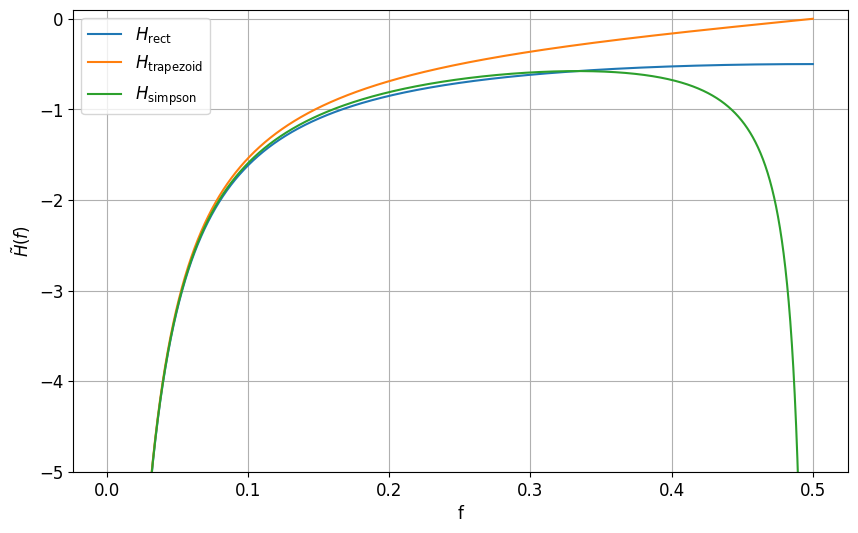

In [34]:
plt.plot(f, H_rect.imag, label=r"$H_{\text{rect}}$")
plt.plot(f, H_trap.imag, label=r'$H_{\text{trapezoid}}$')
plt.plot(f, H_simp.imag, label=r'$H_{\text{simpson}}$')

plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.ylim((-5, .1))
plt.legend()
plt.grid()
plt.show()

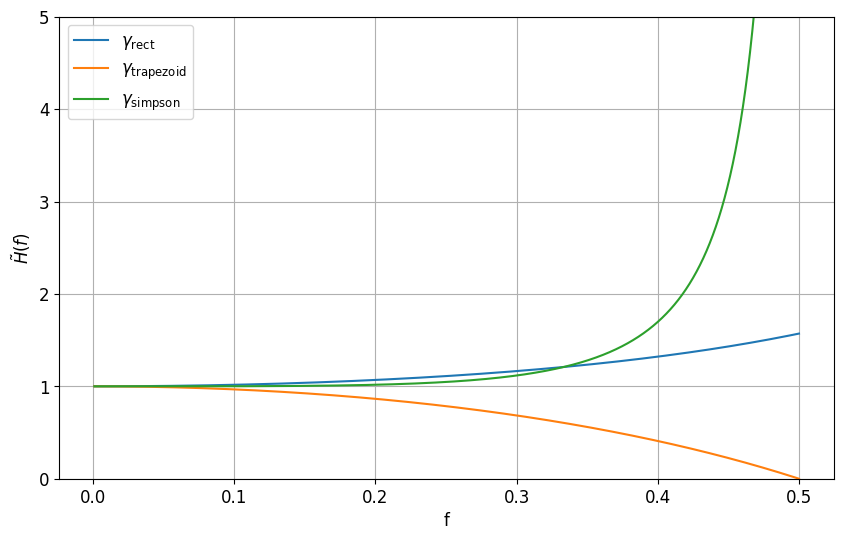

In [35]:
plt.plot(f, gamma_rect, label=r'$\gamma_{\text{rect}}$')
plt.plot(f, gamma_trap, label=r'$\gamma_{\text{trapezoid}}$')
plt.plot(f, gamma_simp, label=r'$\gamma_{\text{simpson}}$')

plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.ylim((0, 5))
plt.legend()
plt.grid()
plt.show()

## Формула по правилу 3/8

Разностное уравнение:
$$y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$$

Подставим гармонические сигналы:
$$y_n = H(\omega)e^{j\omega n}, \quad x_n = e^{j\omega n}$$

Тогда:
$$H(\omega)e^{j\omega (n+2)} = H(\omega)e^{j\omega (n-1)} + \frac{1}{8}(e^{j\omega (n+2)} + 3e^{j\omega (n+1)} + 3e^{j\omega n} + e^{j\omega (n-1)})$$

Вынесем $e^{j\omega (n-1)}$:

$$H(\omega)(e^{j3\omega} - 1) = \frac{1}{8}(e^{j3\omega} + 3e^{j2\omega} + 3e^{j\omega} + 1)$$

$$H(\omega) = \frac{1}{8}\frac{e^{j3\omega} + 3e^{j2\omega} + 3e^{j\omega} + 1}{e^{j3\omega} - 1}$$

Используя тождество $e^{j3\omega} - 1 = 2je^{j3\omega/2}\sin(3\omega/2)$, можно записать:

$$H(\omega) = \frac{e^{j3\omega/2}}{16j\sin(3\omega/2)}(e^{j3\omega/2} + 3e^{j\omega/2} + 3e^{-j\omega/2} + e^{-j3\omega/2})$$

После упрощений:

$$H(\omega) = \frac{3\cos(\omega/2) + \cos(3\omega/2)}{8j\sin(3\omega/2)}$$

$$ \boxed{H(\omega) = \frac{3\cos(\omega/2) + \cos(3\omega/2)}{8j\sin(3\omega/2)}} $$

**Отношение вычисленного к точному интегралу:**

$$\gamma = j\omega H(\omega) = \frac{\omega[3\cos(\omega/2) + \cos(3\omega/2)]}{8\sin(3\omega/2)}$$


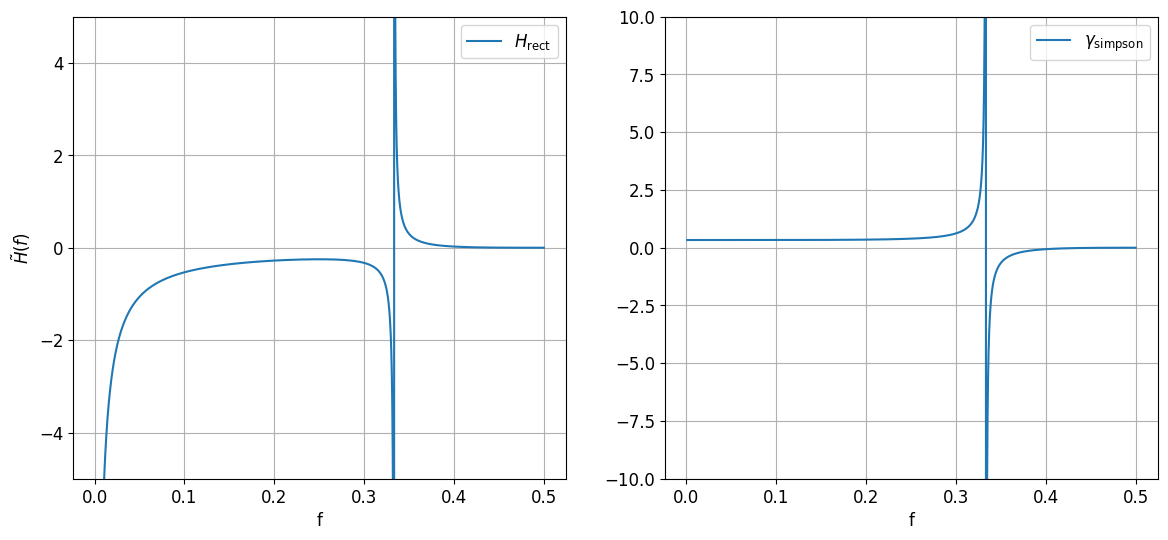

In [39]:
H_38 = (3*np.cos(w/2) + np.cos(3*w/2)) / (8j * np.sin(3*w/2))
gamma_38 = w * (3*np.cos(w/2) + np.cos(3*w/2)) / (8 * np.sin(3*w/2))

plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.plot(f, H_38.imag, label=r"$H_{\text{rect}}$")

plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')
plt.ylim((-5, 5))
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(f, gamma_38, label=r'$\gamma_{\text{simpson}}$')

plt.xlabel('f')
plt.ylim((-10, 10))
plt.legend()
plt.grid()

plt.show()


## Интерпретация частотных свойств

Из анализа видно, что все фильтры обеспечивают точное интегрирование низкочастотных компонент (при $\omega \to 0$ значение $\gamma \to 1$).  
На высоких частотах модули передаточных функций уменьшаются, что отражает ослабление сигналов и рост фазовых искажений.

- **Метод прямоугольников** даёт наибольшую ошибку, особенно при $\omega > 0.4\pi$.  
- **Метод трапеций** имеет лучшую частотную характеристику, особенно в области средних частот.  
- **Формула Симпсона** и **правило 3/8** демонстрируют наилучшее соответствие идеальному интегратору и наименьшие искажения в широкой полосе.



## Сравнительный анализ и выводы

1. Передаточные функции более сложных квадратурных формул (Симпсона, 3/8) лучше аппроксимируют идеальное интегрирование.  
2. Для низких частот все методы эквивалентны (значения $\gamma \approx 1$).  
3. При росте частоты ошибка метода прямоугольников быстро возрастает.  
4. Методы Симпсона и 3/8 сохраняют корректное поведение вплоть до $\omega \approx 0.6\pi$.  

**Вывод:** наиболее точными являются методы Симпсона и 3/8, обеспечивающие минимальные частотные и фазовые искажения.
